# Process results

In [105]:
import geopandas as gpd
import pandas as pd
import os
pd.options.mode.chained_assignment = None
#remove warnings
from tqdm import tqdm 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


for year in range(2017, 2021):
    print(year)
    granularity = 5
    version = 0.3
    directory = f'../data/results/cluster_{year}/'
    disturbances = gpd.read_parquet(os.path.join(directory, f'disturbances_{year}_g{granularity}_v{version}.parquet'))
    clusters = pd.read_parquet(os.path.join(directory, f'clusters_{year}_g{granularity}_v{version}.parquet'))

    #filter clusters if there is an overlap between [Start_Date, End_Date] and [01/01/2018, 01/01/2019]
    clusters_ = clusters[(clusters['Start_Date'] <= pd.Timestamp(year+1, 1, 1)) & (clusters['End_Date'] >= pd.Timestamp(year, 1, 1))]

    #delete pandas warning

    entity_type = ['dfde', 'cdi', 'bdiff']
    geometry_list = []
    for index, row in tqdm(clusters_.iterrows()):
        group = disturbances.iloc[row['Indexes']] 
        group['entity_type'] = group['dataset'].apply(lambda x: x in entity_type)
        m = group.shape[0]
        n = m - group['entity_type'].sum()

        if n >= 1:
            group = group[group['entity_type'] == False]
            m = group.shape[0]
            
        if m == 1:
            geometry_list.append(group.iloc[0]['geometry'])
        else:
            geometry_list.append(group.geometry.unary_union.convex_hull)

    clusters_['geometry'] = geometry_list
    clusters_ = gpd.GeoDataFrame(clusters_, geometry='geometry', crs=disturbances.crs)
    clusters_.to_parquet(os.path.join(directory, f'clusters_filtered_{year}_g{granularity}_v{version}_polygons.parquet'))

2017


76748it [09:40, 132.14it/s]


2018


73068it [08:02, 151.36it/s]


2019


82960it [09:18, 148.65it/s]


2020


87291it [08:49, 164.80it/s]


In [90]:
#delete pandas warning
pd.options.mode.chained_assignment = None
#remove warnings
from tqdm import tqdm 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

entity_type = ['dfde', 'cdi', 'bdiff']
geometry_list = []
for index, row in tqdm(clusters_.iterrows():
    group = disturbances.iloc[row['Indexes']] 
    group['entity_type'] = group['dataset'].apply(lambda x: x in entity_type)
    m = group.shape[0]
    n = m - group['entity_type'].sum()

    if n >= 1:
        group = group[group['entity_type'] == False]
        m = group.shape[0]
        
    if m == 1:
        geometry_list.append(group.iloc[0]['geometry'].centroid)
    else:
        geometry_list.append(group.geometry.centroid.unary_union)

clusters_['geometry'] = geometry_list
clusters_ = gpd.GeoDataFrame(clusters_, geometry='geometry', crs=disturbances.crs)

73068it [07:24, 164.39it/s]


In [103]:
clusters_.to_parquet(os.path.join(directory, f'clusters_filtered_{year}_g{granularity}_v{version}_centroid.parquet'))

In [82]:
index = 0

In [88]:
geometry_list[index].__geo_interface__

{'type': 'Point', 'coordinates': (356787.519865879, 6313459.408387203)}

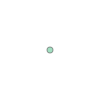

In [86]:
index += 1
geometry_list[index]